In [1]:
import pandas as pd
import numpy as np
import itertools

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import learning_curve, validation_curve, train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV, cross_validate, RepeatedStratifiedKFold
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.datasets import fetch_openml
from xgboost import XGBClassifier

from scipy.stats import loguniform, beta, uniform

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import Pipeline as IMBPipeline

import missingno as msno

import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier


In [2]:
X = pd.read_csv("got1.csv")
y = X.pop("pred")

In [3]:
X 

,S.No,actual,alive,plod,name,title,male,culture,dateOfBirth,DateoFdeath,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,105.0,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,1194,1,0.814,0.186,Denys Mallister,Ser,1,NaN,245.0,NaN,...,NaN,NaN,0,1,60.0,0,0,0,0.130435,1
1194,1195,1,0.437,0.563,Edric Storm,NaN,1,NaN,287.0,NaN,...,NaN,NaN,0,0,18.0,0,0,0,0.284281,1
1195,1196,1,0.310,0.690,Hosteen Frey,Ser,1,NaN,249.0,NaN,...,NaN,1.0,1,1,56.0,0,0,0,0.274247,1
1196,1197,1,0.881,0.119,Lyonel Corbray,Heart's Home,1,NaN,260.0,NaN,...,NaN,NaN,0,1,45.0,0,0,0,0.080268,1


CHECK MISSING VALUES

Before creating the pipeline it is a good idea to check how many missing values we have in the dataframe.

In [4]:
X.isnull().sum(axis=0)/X.shape[0]

S.No                 0.000000
actual               0.000000
alive                0.000000
plod                 0.000000
name                 0.000000
title                0.594324
male                 0.000000
culture              0.678631
dateOfBirth          0.848915
DateoFdeath          0.815526
mother               0.984975
father               0.982471
heir                 0.982471
house                0.290484
spouse               0.895659
book1                0.000000
book2                0.000000
book3                0.000000
book4                0.000000
book5                0.000000
isAliveMother        0.984975
isAliveFather        0.982471
isAliveHeir          0.982471
isAliveSpouse        0.895659
isMarried            0.000000
isNoble              0.000000
age                  0.848915
numDeadRelations     0.000000
boolDeadRelations    0.000000
isPopular            0.000000
popularity           0.000000
isAlive              0.000000
dtype: float64

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198 entries, 0 to 1197
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No               1198 non-null   int64  
 1   actual             1198 non-null   int64  
 2   alive              1198 non-null   float64
 3   plod               1198 non-null   float64
 4   name               1198 non-null   object 
 5   title              486 non-null    object 
 6   male               1198 non-null   int64  
 7   culture            385 non-null    object 
 8   dateOfBirth        181 non-null    float64
 9   DateoFdeath        221 non-null    float64
 10  mother             18 non-null     object 
 11  father             21 non-null     object 
 12  heir               21 non-null     object 
 13  house              850 non-null    object 
 14  spouse             125 non-null    object 
 15  book1              1198 non-null   int64  
 16  book2              1198 

<AxesSubplot: >

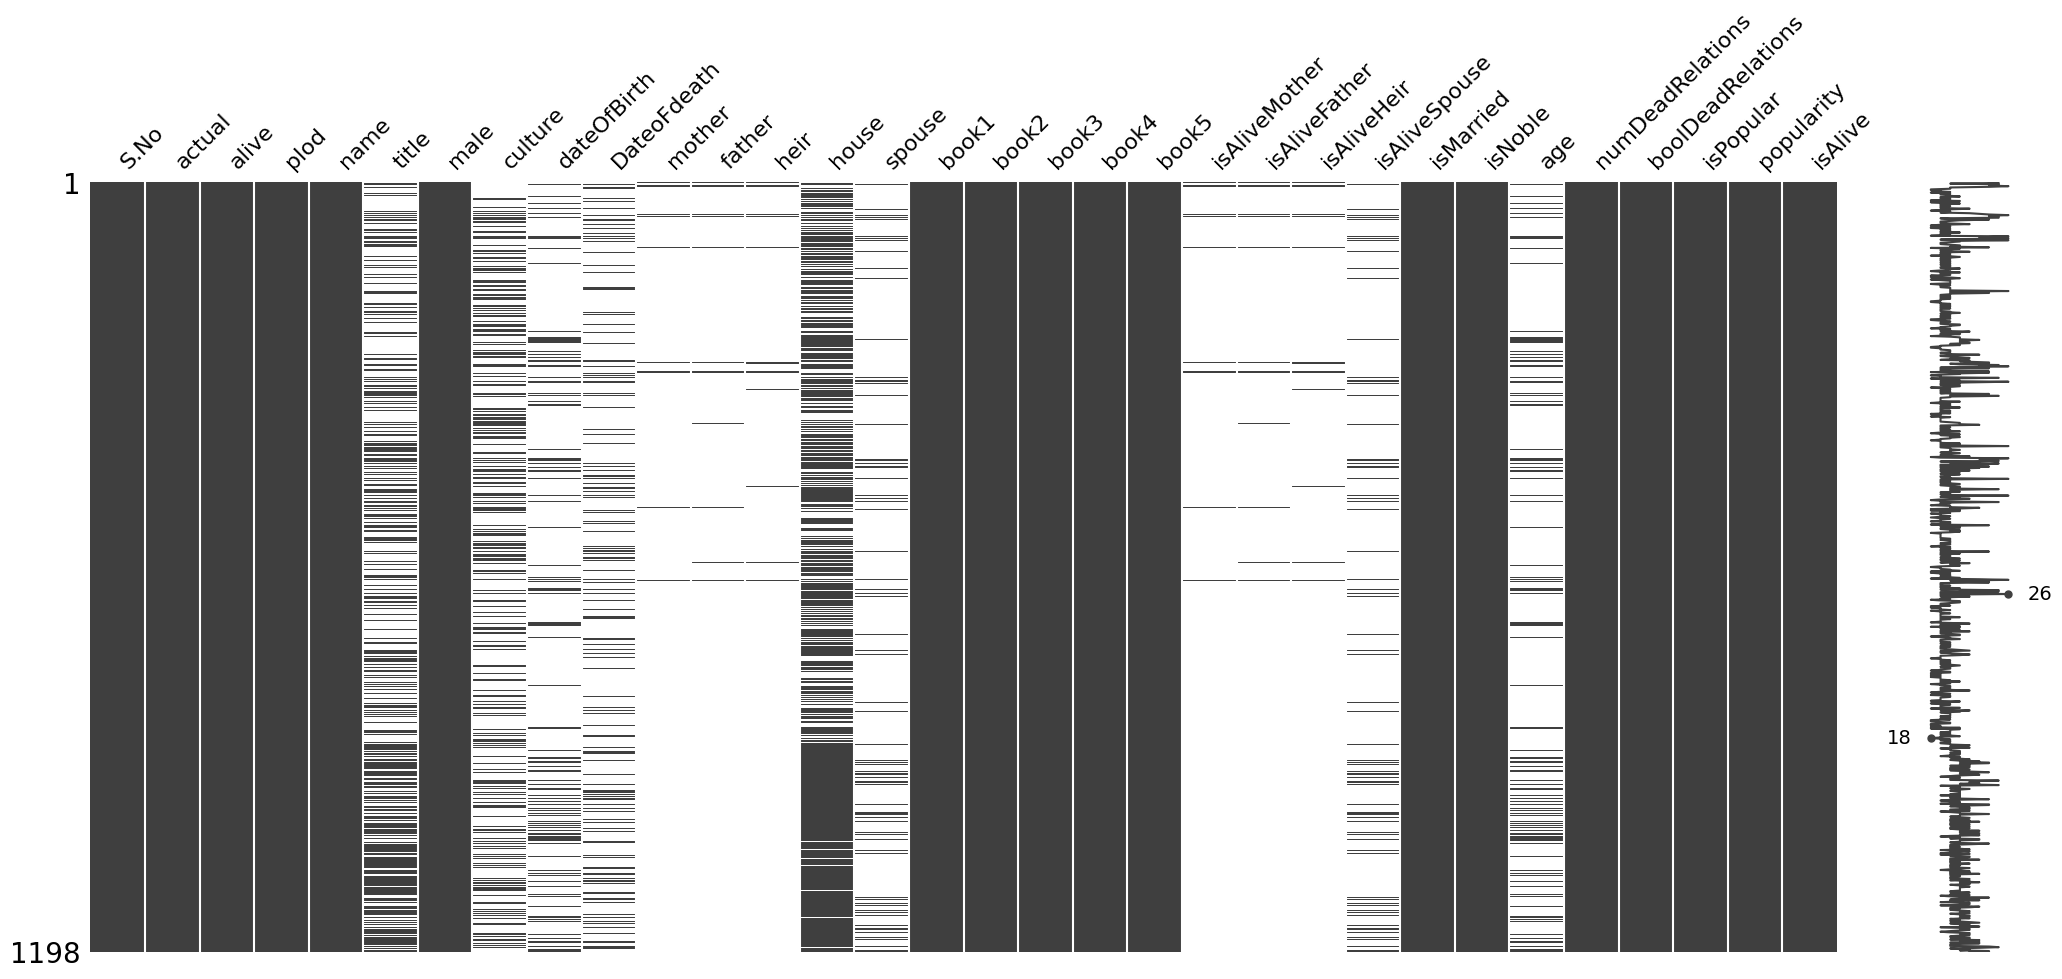

In [6]:
msno.matrix(X)

As we can see, we have a lot of columns full of missing values, so we are going to consider just the ones with a small percentage of missing values and then we are going to drop the remainder columns.

COLUMNS TRANSFORMATIONS

ACTUAL

In [7]:
X['actual'].value_counts()

1    943
0    255
Name: actual, dtype: int64

In [8]:
pipeline_fake = Pipeline([
    ('1', SimpleImputer(strategy="most_frequent"))
])

TITLE

In [9]:
X['title'].value_counts()

Ser                     221
Maester                  24
Archmaester              18
Lord                     14
Septon                   12
                       ... 
QueenBlack Bride          1
Heart's Home              1
Lord of the Deep Den      1
Hayford                   1
King of the Andals        1
Name: title, Length: 118, dtype: int64

In [10]:
pipeline_title = Pipeline([
    ("1", SimpleImputer(strategy="most_frequent")),
    #('1', KNNImputer(n_neighbors=5)),
    ('2', OneHotEncoder(categories='auto',drop='first',handle_unknown='ignore'))
])

MALE

In [11]:
X['male'].value_counts()

1    691
0    507
Name: male, dtype: int64

In [12]:
# Use pipeline_fake

HOUSE

In [13]:
X['house'].value_counts()

Night's Watch      73
House Frey         48
House Stark        46
House Targaryen    33
House Lannister    27
                   ..
House Mooton        1
House Uffering      1
House Mollen        1
House Stonetree     1
Wise Masters        1
Name: house, Length: 255, dtype: int64

In [14]:
pipeline_house = Pipeline([
    ("1", SimpleImputer(strategy="most_frequent")),
    #('1', KNNImputer(n_neighbors=7)),
    ('2', OneHotEncoder(categories='auto',drop='first',handle_unknown='ignore'))
])

ISMARRIED

In [15]:
X['isMarried'].value_counts()

0    1073
1     125
Name: isMarried, dtype: int64

In [16]:
# Use pipeline_fake

ISNOBLE

In [17]:
X['isNoble'].value_counts()

0    735
1    463
Name: isNoble, dtype: int64

In [18]:
# Use pipeline_fake

NUMDEADRELATIONS

In [19]:
X['numDeadRelations'].value_counts()

0     1156
1       12
5        6
7        6
3        4
10       4
4        3
6        2
2        1
8        1
11       1
12       1
15       1
Name: numDeadRelations, dtype: int64

In [20]:
pipeline_numdeadrelations = Pipeline([
    ('1', StandardScaler())
])

POPULARITY

In [21]:
X['popularity'].value_counts()

0.013378    116
0.006689    107
0.016722     99
0.010033     92
0.003344     87
           ... 
0.147157      1
0.217391      1
0.424749      1
0.571906      1
0.518395      1
Name: popularity, Length: 98, dtype: int64

In [22]:
pipeline_popularity = Pipeline([
    ('1', MinMaxScaler())
])

# CREATE COLUMN TRANSFORMER  

With remainder="drop" I discard all the others columns not inolved in the selection. In this case I remove the column county_name. Also verbose_feature_names_out is set equal to False so that the output of the transformer will not include the names of the columns that were transformed. Furthermore, since there are no columns that contains a large number of missing value or of zeros I will set the sparse_threshold equal to 0.

In [23]:
final_transformation = ColumnTransformer(transformers=[
    ('1', pipeline_fake, ['actual', 'male', 'isMarried', 'isNoble']),
    ('2', pipeline_title, ['title']),
    ('3', pipeline_house, ['house']),
    ('4', pipeline_numdeadrelations, ['numDeadRelations']),
    ('5', pipeline_popularity, ['popularity'])
],
remainder= 'drop',
verbose_feature_names_out = False, 
sparse_threshold=0,
n_jobs= -1
)

Testing our transformation, we can see that everything has been transformed and scaled as we specified:

In [24]:
X_sanitycheck = pd.DataFrame(final_transformation.fit_transform(X), columns=final_transformation.get_feature_names_out())
X_sanitycheck

,actual,male,isMarried,isNoble,title_Ashford,title_Big BucketThe Wull,title_Bitterbridge,title_Blackcrown,title_Blackmont,title_Bloodrider,...,house_Sea watch,house_Second Sons,house_Stone Crows,house_Stormcrows,house_The Citadel,house_Windblown,house_Wise Masters,house_wildling,numDeadRelations,popularity
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.567863,0.605351
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.730315,0.896321
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.153440,0.267559
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.153440,0.183946
4,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.153440,0.043478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.153440,0.130435
1194,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.153440,0.284281
1195,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.153440,0.274247
1196,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.153440,0.080268


 TRAIN AND TEST SPLIT

Now it is possible to split the entire dataset in train and test. I will use a test_size of 0.20. The random_state is set to be 8.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, stratify = y, random_state=8)

In [26]:
print('Shape of X_train: {}\nShape of X_test: {}'.format(X_train.shape, X_test.shape))

Shape of X_train: (958, 32)
Shape of X_test: (240, 32)


# Model selection

In [27]:
model_pipeline = IMBPipeline([
    ('trans', final_transformation),
    ('sampler', RandomOverSampler()),
    ('dim_reduction', PCA(n_components=0.95)),
    ('classifier', Perceptron())
])

In [28]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('trans',
                 ColumnTransformer(n_jobs=-1, sparse_threshold=0,
                                   transformers=[('1',
                                                  Pipeline(steps=[('1',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['actual', 'male',
                                                   'isMarried', 'isNoble']),
                                                 ('2',
                                                  Pipeline(steps=[('1',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('2',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['title']),
                                                 ('3',
                                                  Pipeline(st...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('2',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['house']),
                                                 ('4',
                                                  Pipeline(steps=[('1',
                                                                   StandardScaler())]),
                                                  ['numDeadRelations']),
                                                 ('5',
                                                  Pipeline(steps=[('1',
                                                                   MinMaxScaler())]),
                                                  ['popularity'])],
                                   verbose_feature_names_out=False)),
                ('sampler', RandomOverSampler()),
                ('dim_reduction', PCA(n_components=0.95)),
                ('classifier', Perceptron())])

In [29]:
prediction = model_pipeline.predict(X_test)
prediction

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1])

In [30]:
f1_score(y_test, prediction)

0.8414985590778098

SAMPLER

In [31]:
sampler_configs = [
    {
        'sampler':[None],
    },
    {
        'sampler':[SMOTE(n_jobs=-1)],
        'sampler__sampling_strategy':[0.9, 0.8, 0.7]
    },
    {
        'sampler':[RandomOverSampler()],
        'sampler__sampling_strategy':[0.9, 0.8, 0.7]
    }
]

In [32]:
dim_reduction_configs = [
    {
        'dim_reduction': [PCA()] ,
        'dim_reduction__n_components': [0.5, 0.6, 0.7, 0.8, 0.9]
    },
    {
        'dim_reduction': [LDA()]
    },
    {
        'dim_reduction': [SFS(estimator=Perceptron(), cv = None, scoring="f1")],
        'dim_reduction__estimator': [Perceptron(), LogisticRegression()],
        'dim_reduction__k_features' : [5,7,10] 
    }
]

In [33]:
classifier_configs = [
    {
        'classifier': [Perceptron()],
        'classifier__eta0' : loguniform(0.001, 1), 
        'classifier__class_weight' : [None, "balanced"]

    },
    {
        'classifier': [LogisticRegression(solver="lib_linear")],  
        'classifier__C' : loguniform(0.001, 1),
        'classifier__penalty': ["l1", "l2"],
        'classifier__class_weight' : [None, "balanced"]

    },
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [3,5,7,9,11]
    },
    {
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [10, 50, 100,150, 200],
        'classifier__max_depth': [None, 2, 5, 10, 20],
        'classifier__class_weight': [None, 'balanced']
    },

]

- Possible configurations 

The product between such lists of dictionaries creates the list of all possible configurations.  Each dictionary contains a complete configuration for a model that consists of a sampler, a dimensionality reduction method and a classifier. 

In [34]:
all_configs = [dict(itertools.chain(*(e.items() for e in configuration))) 
for configuration in itertools.product(sampler_configs,dim_reduction_configs,classifier_configs)]

We got 36 possible configurations. 

In [35]:
f'Number of all possible configurations: {len(all_configs)}'

'Number of all possible configurations: 36'

The RandomizedSearchCV object allows us to effectively try out every configuration interchanging the elements of our model_pipeline and discovering which ones perform the best. 

In [36]:
rs = RandomizedSearchCV(
    model_pipeline,
    param_distributions=all_configs,
    n_iter=len(all_configs) * 5,
    n_jobs=-1,
    cv = 2, 
    scoring='f1',
    verbose = 1
)

In [37]:
scores = cross_validate(rs, X_train, y_train, scoring='f1', cv = 5, return_estimator=True, verbose=3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Fitting 2 folds for each of 180 candidates, totalling 360 fits
[CV] END ......................................., score=0.850 total time=16.5min
Fitting 2 folds for each of 180 candidates, totalling 360 fits
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 16.5min remaining:    0.0s
[CV] END ......................................., score=0.871 total time=16.1min
Fitting 2 folds for each of 180 candidates, totalling 360 fits
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 32.6min remaining:    0.0s
[CV] END ......................................., score=0.877 total time=16.4min
Fitting 2 folds for each of 180 candidates, totalling 360 fits
[CV] END ......................................., score=0.885 total time=16.2min
Fitting 2 folds for each of 180 candidates, totalling 360 fits
[CV] END ......................................., score=0.876 total time=15.2min
[Parallel(n_jobs=1)]: Done   5 out of  

In [38]:
for index, estimator in enumerate(scores['estimator']):
    print(estimator.best_estimator_.get_params()['sampler'])
    print(estimator.best_estimator_.get_params()['dim_reduction'])
    print(estimator.best_estimator_.get_params()['classifier'],estimator.best_estimator_.get_params()['classifier'].get_params())
    print(scores['test_score'][index])
    print('-'*10)
    print(" ")

None
PCA(n_components=0.7)
KNeighborsClassifier() {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
0.8503401360544218
----------
 
None
PCA(n_components=0.6)
RandomForestClassifier(max_depth=2, n_estimators=50) {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
0.8711656441717792
----------
 
None
PCA(n_components=0.6)
RandomForestClassifier(max_depth=2, n_estimators=200) {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decreas

In [39]:
for estimator in scores['estimator']:
    pred_train = estimator.best_estimator_.fit(X_train, y_train)
    pred_train = estimator.best_estimator_.predict(X_train)
    pred_test = estimator.best_estimator_.predict(X_test)
    f1_train = f1_score(y_train, pred_train)
    f1_test = f1_score(y_test, pred_test)
    print(f'F1 on training set: {f1_train}, F1 on test set: {f1_test}, Difference of F1 on train and test set: {f1_train - f1_test}')

F1 on training set: 0.909819639278557, F1 on test set: 0.8911917098445596, Difference of F1 on train and test set: 0.01862792943399738
F1 on training set: 0.8808030112923463, F1 on test set: 0.8872180451127819, Difference of F1 on train and test set: -0.006415033820435623
F1 on training set: 0.8806532663316584, F1 on test set: 0.8916876574307305, Difference of F1 on train and test set: -0.011034391099072116
F1 on training set: 0.9799585348997927, F1 on test set: 0.8776595744680851, Difference of F1 on train and test set: 0.10229896043170761
F1 on training set: 0.8874259381171823, F1 on test set: 0.8743455497382198, Difference of F1 on train and test set: 0.013080388378962526


It can be seen that all the models have a generalization gap that is not too large. After testing different model I decide to use PCA with KNeighboursClassifier. 

The hyperparameters used in the refinemment model are a little bit different because I ran it many times and they slightly changed.

REFINEMENT OF THE SELECTED MODEL


In [40]:
best_model_pipeline = IMBPipeline([
    ('trans', final_transformation),

    # For KNeighborsClassifier
    ("dim_reduction", PCA(n_components=0.9)),
    ("classifier", KNeighborsClassifier(n_neighbors=11))
])

In [41]:
params = {

    # For KNeighborsClassifier
    "classifier__n_neighbors": [3,5,7,9,11,13,15,17,19,21]
    
}

In [42]:
rs_best = RandomizedSearchCV(
    estimator = best_model_pipeline,
    param_distributions = params,
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3),
    n_iter=20,
    scoring='f1'
)

In [43]:
rs_best.fit(X_train, y_train)

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=None),
                   estimator=Pipeline(steps=[('trans',
                                              ColumnTransformer(n_jobs=-1,
                                                                sparse_threshold=0,
                                                                transformers=[('1',
                                                                               Pipeline(steps=[('1',
                                                                                                SimpleImputer(strategy='most_frequent'))]),
                                                                               ['actual',
                                                                                'male',
                                                                                'isMarried',
                                                                                'isNoble']),
                                                                              ('2',
                                                                               Pipeline(steps=[('1',
                                                                                                SimpleImputer(strategy='most_...
                                                                               Pipeline(steps=[('1',
                                                                                                StandardScaler())]),
                                                                               ['numDeadRelations']),
                                                                              ('5',
                                                                               Pipeline(steps=[('1',
                                                                                                MinMaxScaler())]),
                                                                               ['popularity'])],
                                                                verbose_feature_names_out=False)),
                                             ('dim_reduction',
                                              PCA(n_components=0.9)),
                                             ('classifier',
                                              KNeighborsClassifier(n_neighbors=11))]),
                   n_iter=20,
                   param_distributions={'classifier__n_neighbors': [3, 5, 7, 9,
                                                                    11, 13, 15,
                                                                    17, 19,
                                                                    21]},
                   scoring='f1')

In [44]:
rs_best.best_estimator_

Pipeline(steps=[('trans',
                 ColumnTransformer(n_jobs=-1, sparse_threshold=0,
                                   transformers=[('1',
                                                  Pipeline(steps=[('1',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['actual', 'male',
                                                   'isMarried', 'isNoble']),
                                                 ('2',
                                                  Pipeline(steps=[('1',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('2',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['title']),
                                                 ('3',
                                                  Pipeline(st...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('2',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['house']),
                                                 ('4',
                                                  Pipeline(steps=[('1',
                                                                   StandardScaler())]),
                                                  ['numDeadRelations']),
                                                 ('5',
                                                  Pipeline(steps=[('1',
                                                                   MinMaxScaler())]),
                                                  ['popularity'])],
                                   verbose_feature_names_out=False)),
                ('dim_reduction', PCA(n_components=0.9)),
                ('classifier', KNeighborsClassifier(n_neighbors=9))])

In [45]:
f1_score(y_test, rs_best.best_estimator_.predict(X_test))

0.8759493670886077

In [46]:
cls = rs_best.best_estimator_

In [47]:
train_sizes, train_scores, test_scores = learning_curve(cls,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes= [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                                       cv = 5,
                                                       n_jobs = -1,
                                                       scoring = 'f1',
                                                       shuffle = False)

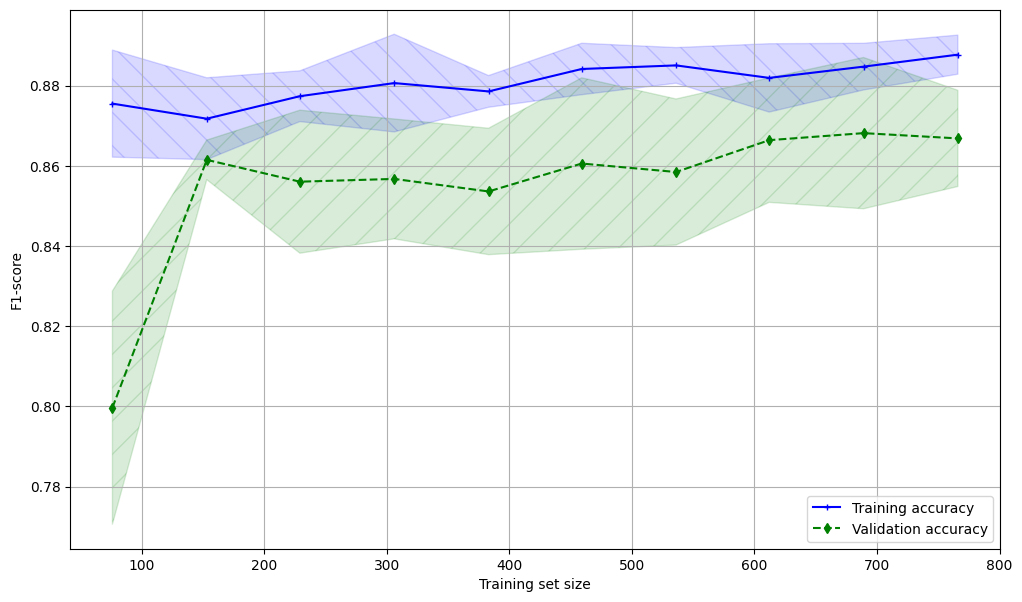

In [48]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(12,7))
axA = fig.add_subplot()

axA.plot(train_sizes, train_mean,
         color='blue', marker='+',
         markersize=5, label='Training accuracy')

axA.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, 
                 color='blue', 
                 hatch='\\')

axA.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='d', markersize=5,
         label='Validation accuracy')

axA.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, 
                 color='green',
                 hatch = "/")

axA.grid()
axA.set_xlabel('Training set size')
axA.set_ylabel('F1-score')
axA.legend(loc='lower right')
axA.set_autoscale_on(True)

In [49]:
range_classifier = [3,5,7,9,11,13,15,17,19,21]
train_scores, test_scores = validation_curve(cls,
        X=X_train, 
        y=y_train, 
        param_range=
        range_classifier, 
        param_name='classifier__n_neighbors',
        cv=5, 
        n_jobs=-1, 
        scoring='f1'
)

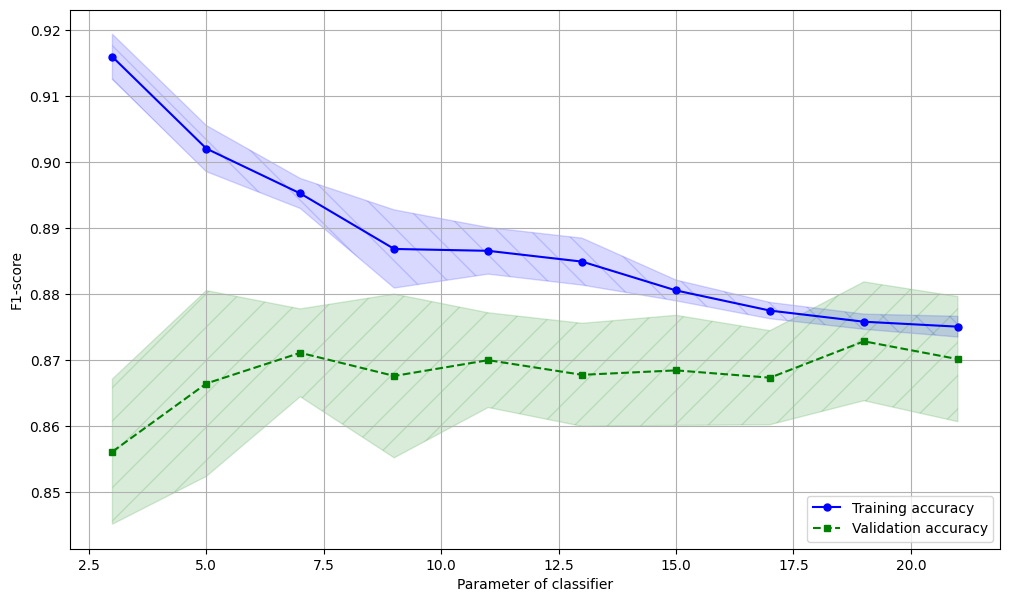

In [50]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(12,7))
axB = fig.add_subplot()
axB.plot(range_classifier, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

axB.fill_between(range_classifier,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, 
                 color='blue',
                 hatch='\\')

axB.plot(range_classifier, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

axB.fill_between(range_classifier,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, 
                 color='green',
                 hatch = "/")

axB.grid()
axB.set_xlabel('Parameter of classifier')
axB.set_ylabel('F1-score')
axB.legend(loc='lower right')
axB.set_autoscale_on(True)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e1f92c3d-6506-439a-8f9b-647ed9be65ba' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>